In [1]:
# Import libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Libraries to build the model

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Training data

In [6]:
path_train_data = 'C:/Users/EM/Bureau/projet_de_fin_detude/application/dataset/train/'

In [7]:
# Benign_files_train

In [8]:
benign_files=os.listdir(path_train_data+'benign')

print(benign_files[0:6])
print(benign_files[-6:])

['melanoma_0.jpg', 'melanoma_1.jpg', 'melanoma_10.jpg', 'melanoma_100.jpg', 'melanoma_1000.jpg', 'melanoma_1001.jpg']
['melanoma_994.jpg', 'melanoma_995.jpg', 'melanoma_996.jpg', 'melanoma_997.jpg', 'melanoma_998.jpg', 'melanoma_999.jpg']


In [9]:
# Malignant_files_train

In [10]:
malignant_files=os.listdir(path_train_data+'malignant')

print(malignant_files[0:6])
print(malignant_files[-6:])

['melanoma_5000.jpg', 'melanoma_5001.jpg', 'melanoma_5002.jpg', 'melanoma_5003.jpg', 'melanoma_5004.jpg', 'melanoma_5005.jpg']
['melanoma_9599.jpg', 'melanoma_9600.jpg', 'melanoma_9601.jpg', 'melanoma_9602.jpg', 'melanoma_9603.jpg', 'melanoma_9604.jpg']


In [11]:
# Testing data

In [12]:
path_test_data = 'C:/Users/EM/Bureau/projet_de_fin_detude/application/dataset/test/'

In [13]:
# Benign_files_test

In [14]:
benign_files=os.listdir(path_test_data+'benign')

print(benign_files[0:6])
print(benign_files[-6:])

['melanoma_10000.jpg', 'melanoma_10001.jpg', 'melanoma_10002.jpg', 'melanoma_10003.jpg', 'melanoma_10004.jpg', 'melanoma_10005.jpg']
['melanoma_9994.jpg', 'melanoma_9995.jpg', 'melanoma_9996.jpg', 'melanoma_9997.jpg', 'melanoma_9998.jpg', 'melanoma_9999.jpg']


In [15]:
#Malignant_files_test

In [16]:
malignant_files=os.listdir(path_test_data+'malignant')

print(malignant_files[0:6])
print(malignant_files[-6:])

['melanoma_10105.jpg', 'melanoma_10106.jpg', 'melanoma_10107.jpg', 'melanoma_10108.jpg', 'melanoma_10109.jpg', 'melanoma_10110.jpg']
['melanoma_10599.jpg', 'melanoma_10600.jpg', 'melanoma_10601.jpg', 'melanoma_10602.jpg', 'melanoma_10603.jpg', 'melanoma_10604.jpg']


In [17]:
# Distribution of our dataset

In [18]:
input_path = 'C:/Users/EM/Bureau/projet_de_fin_detude/application/dataset/'

In [19]:
for _set in ['train', 'test']:
    len_benign = len(os.listdir(input_path+_set+'/benign/'))
    len_malignant = len(os. listdir(input_path+_set+'/malignant'))
    print('Set: {}, benign images: {}, malignant images: {}'.format(_set, len_benign, len_malignant))

Set: train, benign images: 5000, malignant images: 4605
Set: test, benign images: 500, malignant images: 500


In [20]:
# Show classes

In [21]:
{'benign': 0, 'malignant': 1}

{'benign': 0, 'malignant': 1}

In [22]:
# Some samples

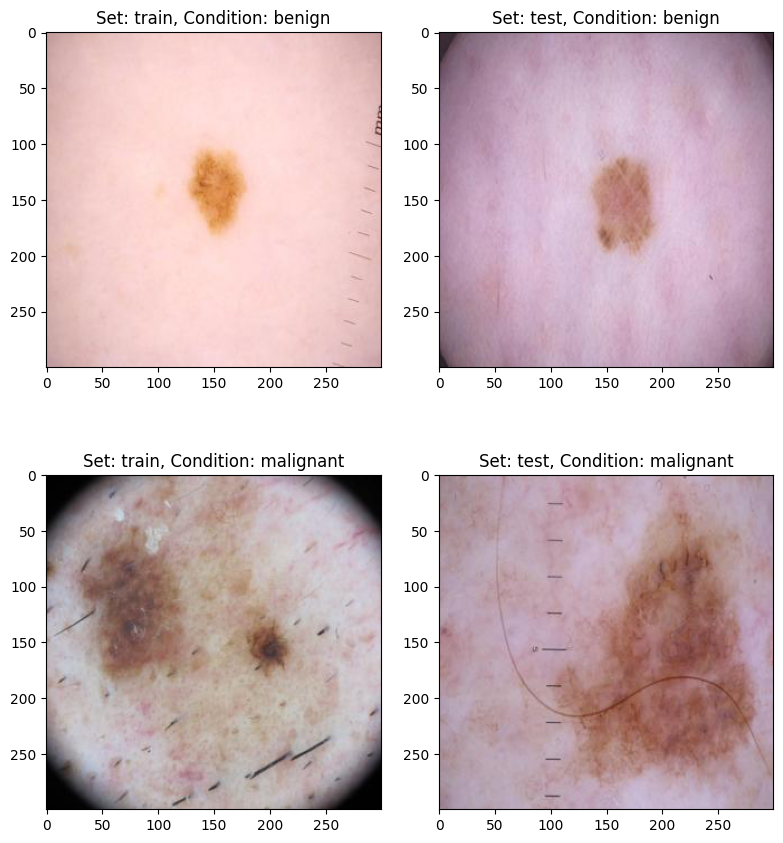

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(8, 9))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/benign/'+os.listdir(set_path+'/benign')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: benign'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/malignant/'+os.listdir(set_path+'/malignant')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: malignant'.format(_set))
plt.show()

In [24]:
# Data preprocessing

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/EM/Bureau/projet_de_fin_detude/application/dataset/train',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'C:/Users/EM/Bureau/projet_de_fin_detude/application/dataset/test',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# The model

In [28]:
# Initialize the model
model = Sequential()

# Add a Convolution layer (input layer)
model.add(Convolution2D(64, 3, 3, input_shape = (300, 300, 3), activation = 'relu'))

# Add a Pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a second convolution-Pooling layers
model.add(Convolution2D(64, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a Flatten layer
model.add(Flatten())

# Add a Fully Connected layer
model.add(Dense(units = 128, activation = 'relu'))

# Add a Dense layer (output layer)
model.add(Dense(units = 1, activation = 'sigmoid'))

In [29]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 563,265 (2.15 MB)

 Trainable params: 563,265 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compiling the CNN
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Early stopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [33]:
# Train the model

In [34]:
model.fit(training_set, epochs=30, validation_data=test_set, callbacks=[early_stop])

Epoch 1/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 178s 575ms/step - accuracy: 0.7339 - loss: 0.5132 - val_accuracy: 0.8760 - val_loss: 0.2806
Epoch 2/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 591ms/step - accuracy: 0.8691 - loss: 0.3098 - val_accuracy: 0.8990 - val_loss: 0.2524
Epoch 3/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 588ms/step - accuracy: 0.8794 - loss: 0.2815 - val_accuracy: 0.8990 - val_loss: 0.2421
Epoch 4/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 588ms/step - accuracy: 0.8856 - loss: 0.2739 - val_accuracy: 0.8860 - val_loss: 0.2525
Epoch 5/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 587ms/step - accuracy: 0.8869 - loss: 0.2633 - val_accuracy: 0.9110 - val_loss: 0.2327
Epoch 6/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 588ms/step - accuracy: 0.8953 - loss: 0.2510 - val_accuracy: 0.8440 - val_loss: 0.3422
Epoch 7/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 587ms/step - accuracy: 0.8923 - loss: 0.2586 - val_accuracy: 0.9100 - val_loss: 0.2190
Epoch 8/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 181s 588ms/step - accuracy: 0.9060 -

In [35]:
# Loss and accuracy

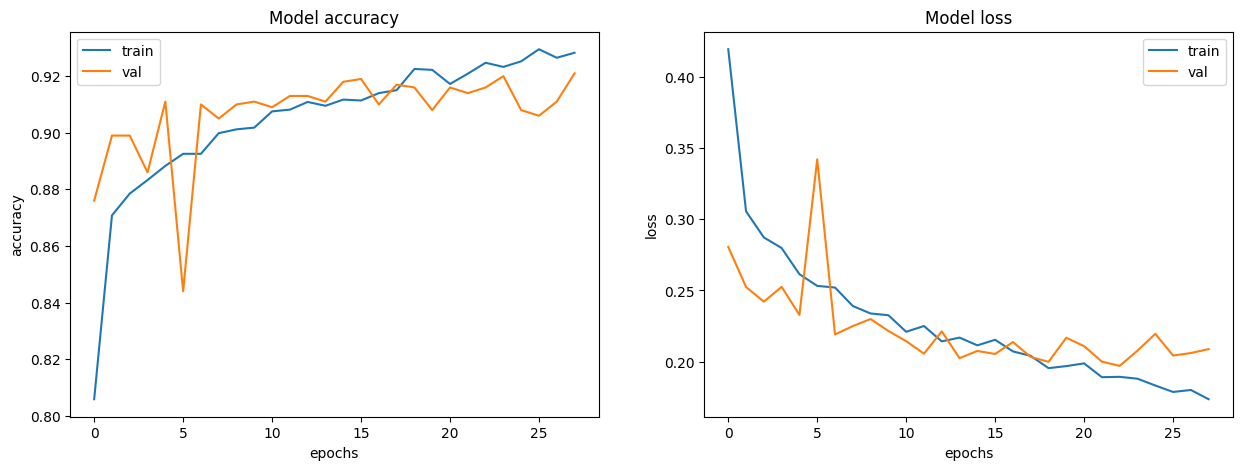

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(model.history.history[met])
    ax[i].plot(model.history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel (met)
    ax[i].legend(['train', 'val'])
plt.show()

In [37]:
# Print classes

In [38]:
print(training_set.class_indices)

{'benign': 0, 'malignant': 1}


In [39]:
# Save the model

In [40]:
filename = 'C:/Users/EM/Bureau/projet_de_fin_detude/application/model.h5'
model.save(filename)
print('>Saved %s' % filename)

>Saved C:/Users/EM/Bureau/projet_de_fin_detude/application/model.h5
